### 계층적 군집
+ 군집트리, 덴드로그램을 생성하여 다양한 데이터를 그룹화
+ 비슷한 군집끼리 묶어가며 최종적으로 하나의 군집단으로 묶는 기법
+ 즉, 군집간의 거리를 기반으로 군집화하는 방식으로 기존의 군집기반(kmeans)에 비해 군집수를 지정할 필요가 없음
+ 계층적 군집의 종류는 응집형, 분리형 
    + 응집형 : 개별데이터 군집 -> 군집단 형성
    + 분리형 : 데이터 전체를 하나의 군집 -> 세부적으로 여러 군집으로 나눔

#### mglearn 패키지
+ '파이썬 라이브러리를 활용한 머신러닝' 저자의 교육용 패키지

<img src='img/dendrogram.png'>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import mglearn

In [4]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

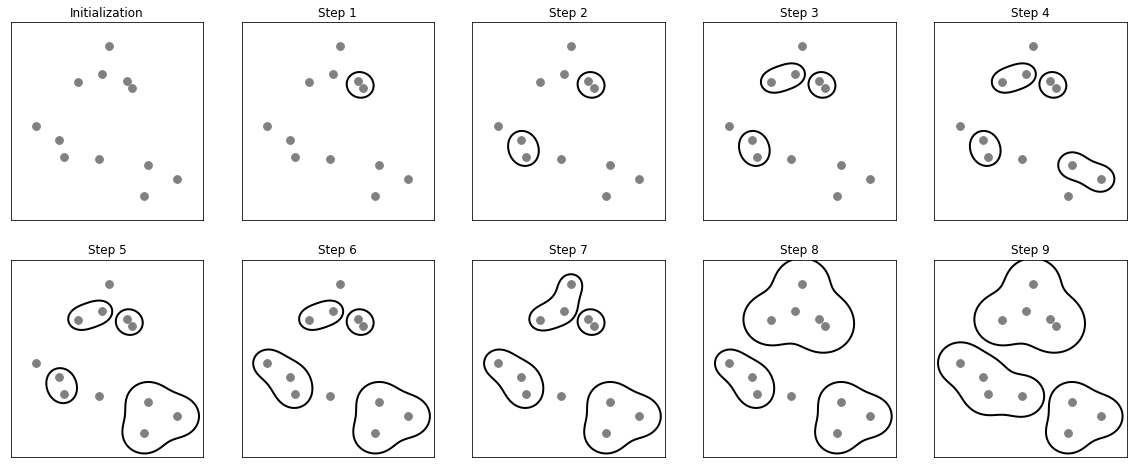

In [3]:
mglearn.plots.plot_agglomerative_algorithm()

### 덴드로그램 시각화

In [7]:
X = np.array([[5,3], [10,5], [15,12],
              [24,10], [30,30], [85,70],
              [71,80], [60,78], [70,55],
              [80,91] ])

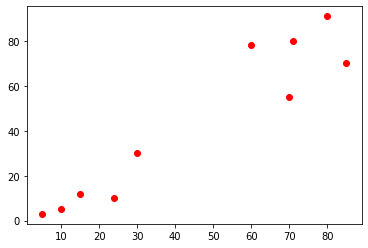

In [11]:
plt.plot(X[:,0], X[:,1],'ro')

#### 덴드로그램 작동원리

+ linkage 함수의 method 속성으로 각 군집간의 연결방식을 지정

+ single/average/complete/centeroid/ward

+ 단일single    : 각 군집을 대상으로 최소거리 기준 (가까운것부터 군집)

+ 평균average   : 각 군집을 대상으로 평균거리 기준

+ 최대complete  : 각 군집을 대상으로 최대거리 기준 (먼것부터 군집)

+ 중심centeroid : 각 군집내 중심점 기준

+ 와드ward      : 군집간 SSW(응집도), SSB(분리도)간의 차이를 이용

<img src='img/linkage.png' width='75%'>

#### linkage(객체, method=거리계산법)

In [15]:
linked = linkage(X, method = 'ward')

#### orientation : 덴드로그램 그래프 방향
#### distance_sort : 군집간 거리 출력순서
#### show_leat_counts : 가지수 출력

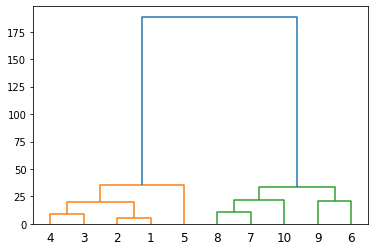

In [21]:
dendrogram(linked, orientation='top', labels=range(1,11), distance_sort='descending',  show_leaf_counts=True)
plt.show()

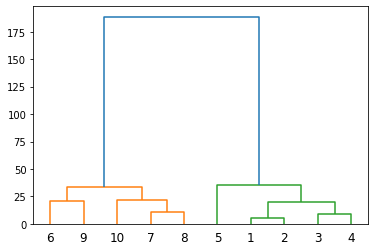

In [22]:
dendrogram(linked, orientation='top', labels=range(1,11), show_leaf_counts=True)
plt.show()

#### 군집을 나눌 때 적절한 군집간 distance는?
+ 덴드로그램을 보고 n개의 군집을 나누려고 할 때 적절한 y축값은?
+ 덴드로그램에서는 밑에서 위로 올라갈수록 군집을 의미하는 선의 개수가 줄어듬 (응집형 군집)
+ scipy에서는 fcluster 함수를 이용해서 distance가 특정값일떄 군집 정보를 알려줌

#### fcluster(연결방식, 거리, 거리측정방식)

In [24]:
clusters = fcluster(linked, 20, criterion= 'distance')
clusters

array([5, 5, 5, 5, 6, 1, 3, 3, 2, 4], dtype=int32)

In [25]:
nc = np.unique(clusters)
np.count_nonzero(nc)

6

#### 만일, 군집간 거리를 30으로 하면 군집의 개수는?

In [26]:
clusters = fcluster(linked, 30, criterion= 'distance')
clusters

array([3, 3, 3, 3, 4, 1, 2, 2, 1, 2], dtype=int32)

In [27]:
nc = np.unique(clusters)
np.count_nonzero(nc)

4

#### sklearn으로 응집형 군집 실시
+ AgglomerativeClustering 패키지 사용


In [29]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage='ward')
cluster.fit_predict(X)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [33]:
cluster.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

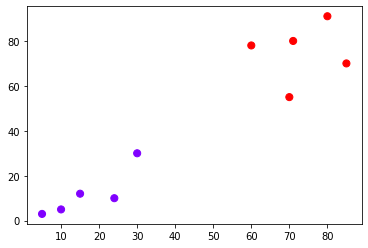

In [35]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, s=50, cmap='rainbow')

#### iris 데이터셋을 응집형 군집으로 나눠봄 1:
+ 군집간 연결방식 : average, ward

In [124]:
from sklearn.datasets import load_iris

In [125]:
iris = load_iris()

In [126]:
X = iris.data
Y = iris.target

#### 응집형 군집 1

In [67]:
link = linkage(X, method = 'average')

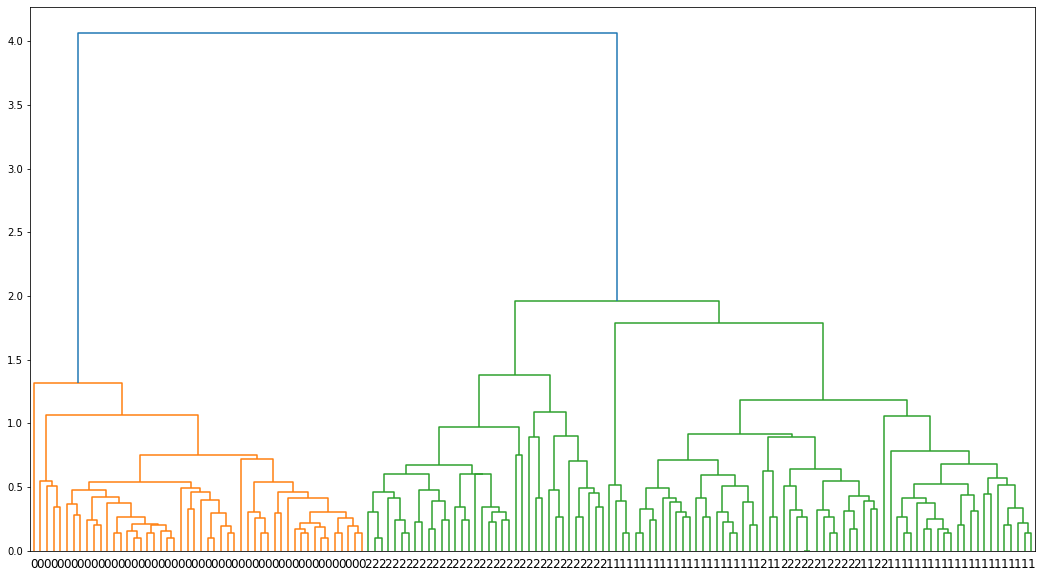

In [71]:
plt.figure(figsize=(18,10))
dendrogram(link, labels=Y, leaf_rotation=0, leaf_font_size=12)
plt.show()

#### 응집형 군집 2

In [72]:
link = linkage(X, method = 'ward')

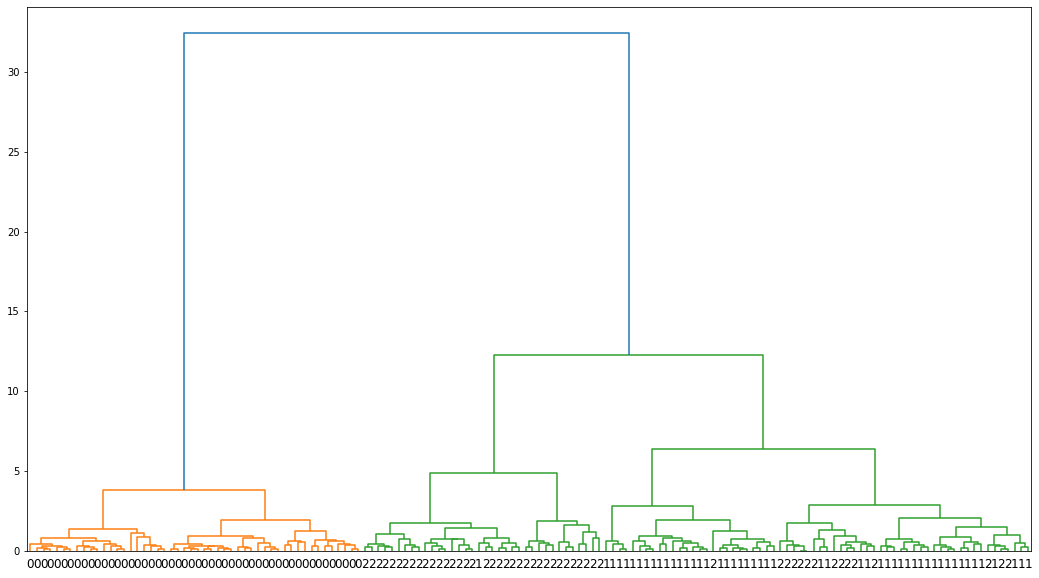

In [73]:
plt.figure(figsize=(18,10))
dendrogram(link, labels=Y, leaf_rotation=0, leaf_font_size=12)
plt.show()

#### 3개의 군집으로 나눌 때 적절한 distance는?

In [79]:
fcluster(link, 10, criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

#### iris 데이터셋을 응집형 군집으로 나눠봄 2:

In [89]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage='average')
cluster.fit_predict(X)
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [90]:
silhouette_score(X, cluster.labels_)

0.5541608580282851

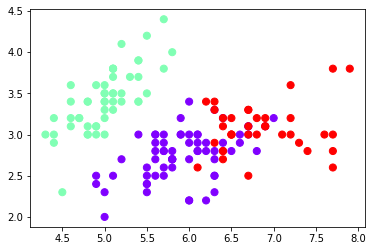

In [91]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, s=50, cmap='rainbow')

In [92]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage='ward')
cluster.fit_predict(X)
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [93]:
silhouette_score(X, cluster.labels_)

0.5543236611296419

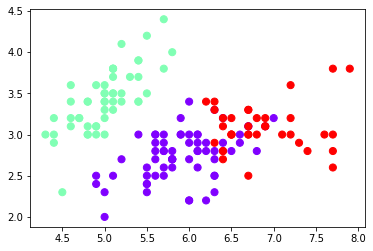

In [94]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, s=50, cmap='rainbow')

#### 실루엣 그래프로 적절한 군집수 확인

In [97]:
from sklearn.datasets import make_blobs

In [106]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, random_state=2111161155)

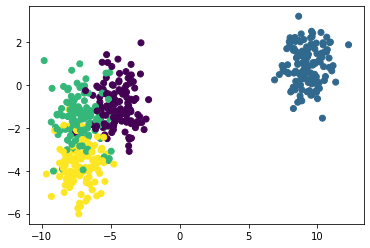

In [107]:
plt.scatter(X[:,0], X[:,1], c=y)

#### 클러스터 개수가 2~4일 때 실루엣 계수를 시각화

In [64]:
import mldlpy3

#### visualize_silhouette(군집수, 대상객체)

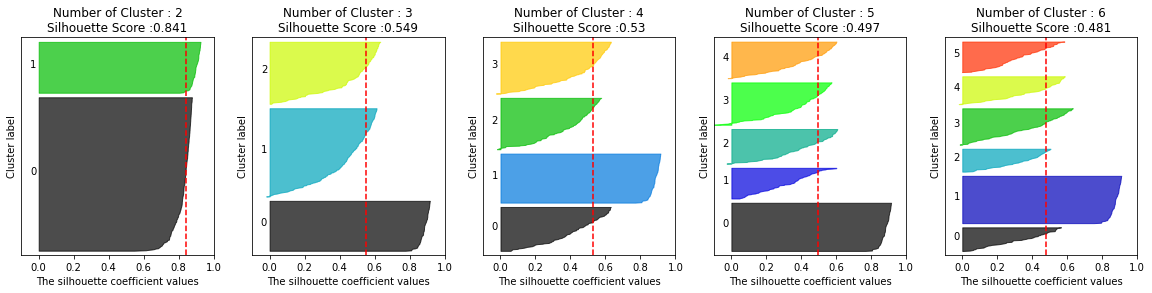

In [112]:
mldlpy3.visualize_silhouette([2,3,4,5,6], X)

#### iris 데이터를 기준으로 클러스터 개수가 2~5일 때 실루엣계수를 시각화

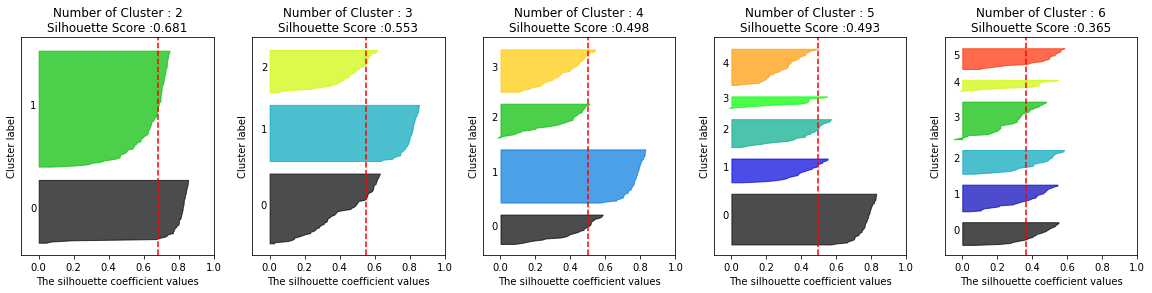

In [128]:
mldlpy3.visualize_silhouette([2,3,4,5,6], X)

In [133]:
silhouette_score(X, cluster.labels_)

0.5543236611296419

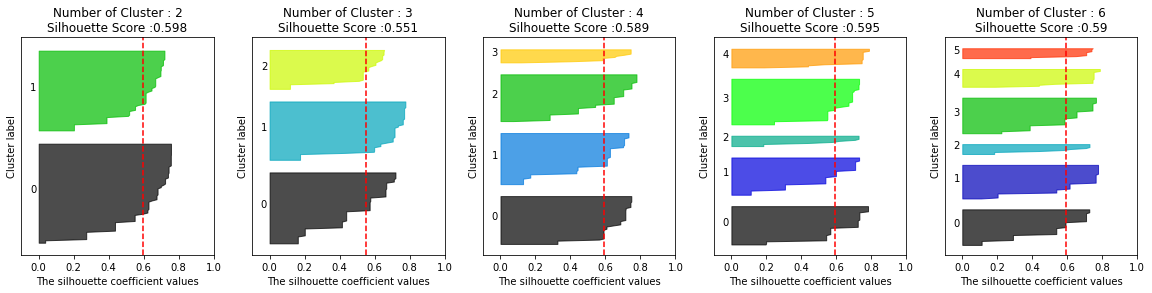

In [129]:
mldlpy3.visualize_silhouette([2,3,4,5,6], iris.data[:, :1])

In [134]:
silhouette_score(iris.data[:, :1], cluster.labels_)

0.3134918268281594

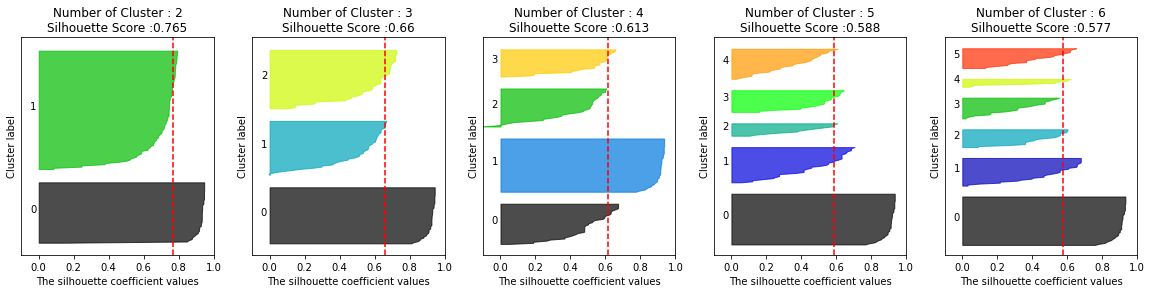

In [132]:
mldlpy3.visualize_silhouette([2,3,4,5,6], iris.data[:, 2:4])

In [135]:
silhouette_score(iris.data[:, 2:4], cluster.labels_)

0.6398270745578704

#### 학생성적과 집중도를 기준으로 클래스를 나눌려고 할 때 몇 개의 반으로 나누는 것이 좋을지 텐드로그램으로 시각화

In [138]:
ac = pd.read_csv('data/academy.csv', encoding='euc-kr')

In [140]:
ac.head()

,학생번호,국어점수평균,수학점수평균,영어점수평균,과학점수평균,학업집중도
0,1,90,75,85,60,70
1,2,65,90,60,88,80
2,3,45,53,48,50,60
3,4,77,96,62,92,70
4,5,88,89,80,82,90


In [250]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   학생번호    52 non-null     int64
 1   국어점수평균  52 non-null     int64
 2   수학점수평균  52 non-null     int64
 3   영어점수평균  52 non-null     int64
 4   과학점수평균  52 non-null     int64
 5   학업집중도   52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [ ]:
plt.scatter(ac.iloc[:,1:4], ac.iloc[:,5:], c=cluster.labels_, s=50, cmap='rainbow')

In [188]:
link1 = linkage(ac.iloc[:, 1:], method = 'average')

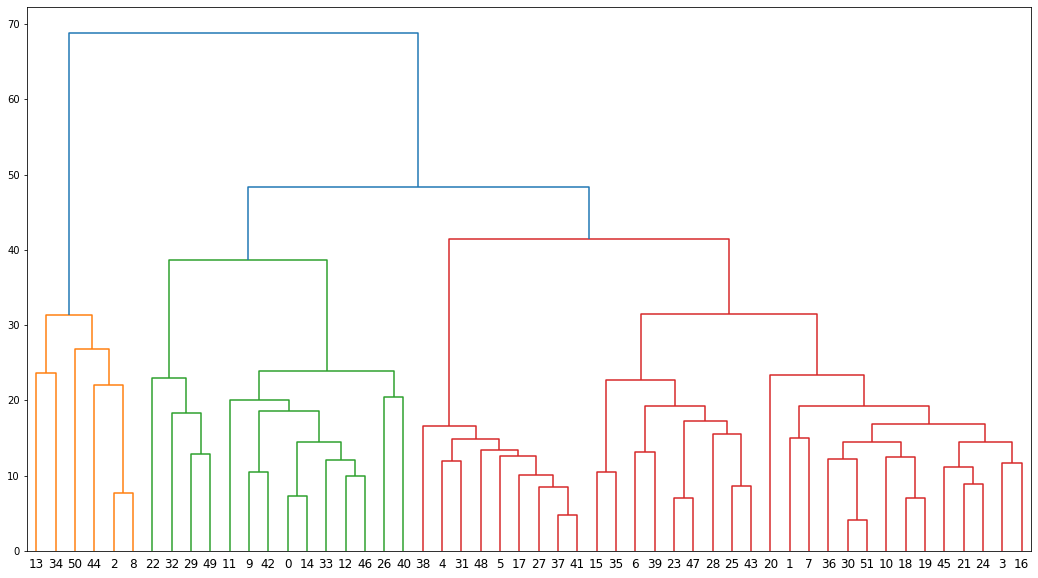

In [189]:
plt.figure(figsize=(18,10))
dendrogram(link1, leaf_rotation=0, leaf_font_size=12)
plt.show()

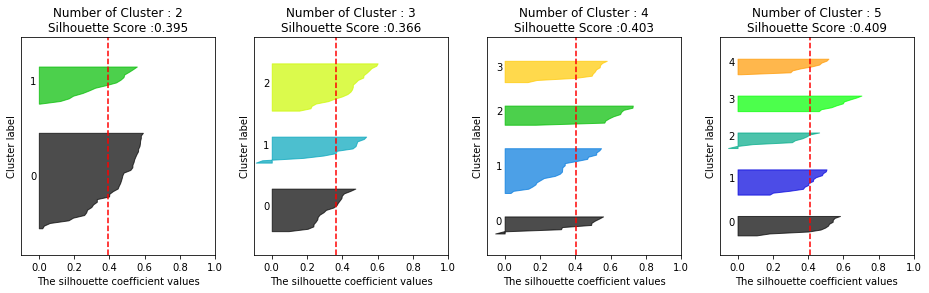

In [212]:
mldlpy3.visualize_silhouette([2,3,4,5], ac.iloc[:, 1:])

In [225]:

cluster = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage='average')
cluster.fit_predict(ac.iloc[:, 1:])
cluster.labels_

array([2, 1, 0, 1, 3, 3, 5, 1, 0, 2, 1, 2, 2, 0, 2, 5, 1, 3, 1, 1, 1, 1,
       4, 5, 1, 5, 2, 3, 5, 4, 1, 3, 4, 2, 0, 5, 1, 3, 3, 5, 2, 3, 2, 5,
       0, 1, 2, 5, 3, 4, 0, 1])

In [226]:
silhouette_score(ac.iloc[:, 1:], cluster.labels_)

0.4193853770747807

In [205]:
xx = ac.iloc[:,1:]

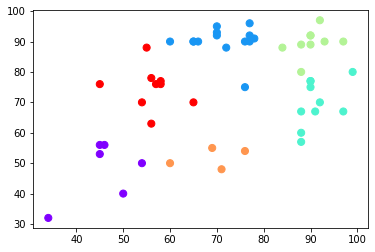

In [227]:
plt.scatter(xx.iloc[:,0], xx.iloc[:,1], c=cluster.labels_, s=50, cmap='rainbow')

In [228]:
link2 = linkage(ac.iloc[:, 1:], method = 'ward')

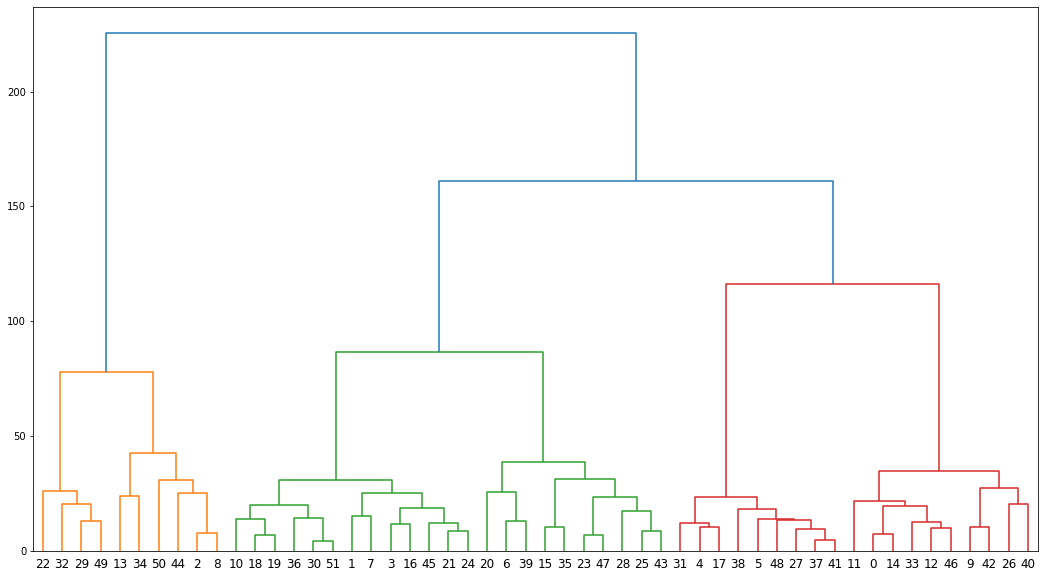

In [229]:
plt.figure(figsize=(18,10))
dendrogram(link2, leaf_rotation=0, leaf_font_size=12)
plt.show()

In [236]:
cluster = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage='ward')
cluster.fit_predict(ac.iloc[:, 1:])
cluster.labels_

array([2, 4, 0, 4, 3, 3, 1, 4, 0, 2, 4, 2, 2, 0, 2, 1, 4, 3, 4, 4, 1, 4,
       5, 1, 4, 1, 2, 3, 1, 5, 4, 3, 5, 2, 0, 1, 4, 3, 3, 1, 2, 3, 2, 1,
       0, 4, 2, 1, 3, 5, 0, 4])

In [237]:
silhouette_score(ac.iloc[:, 1:], cluster.labels_)

0.410438406353572

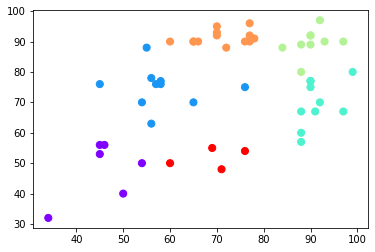

In [238]:
plt.scatter(xx.iloc[:,0], xx.iloc[:,1], c=cluster.labels_, s=50, cmap='rainbow')

#### ggplot에서 제공하는 다이아몬드 데이터셋을 이용해서 군집분석 실시
+ 가격, 캐럿수, 깊이, 테이블만 추출해서 군집 수행

In [5]:
dia = pd.read_csv('data/diamonds.csv')

In [6]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
Z = dia.iloc[:, [0, 4, 5, 6]]

#### 기존 분류(군집) 결과

In [14]:
dia.cut.value_counts() # cut으로 분류 : 5가지

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [16]:
dia.color.value_counts() # color로 분류 : 7가지

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [17]:
dia.clarity.value_counts() # clarity로 분류 : 8가지

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [29]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### 최적의 군집수 알아보기

In [ ]:
sss = []
els = []
for k in range(4,10+1): 
    kms = KMeans(n_clusters=k, max_iter=100, random_state=2111151445)
     
kms.fit(Z)
ss = silhouette_score(Z, kms.labels_, metric='euclidean')
sss.append(ss)
els.append(kms.inertia_)
plt.plot(range(4,10+1), ss, 'ro')
plt.plot(range(4,10+1), els, 'ro')

#### 시각화

In [42]:
c = ['red', 'blue', 'green' ,'pink' ,'navy']

#### 군집이 5개일때

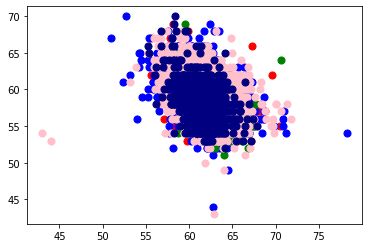

In [44]:
for i in range(5):
    plt.scatter(Z.iloc[kms.labels_ == i,1], Z.iloc[kms.labels_== i,2], c=c[i], s=50, marker='o')

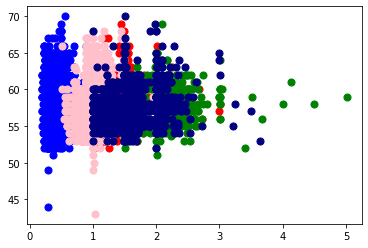

In [45]:
for i in range(5):
    plt.scatter(Z.iloc[kms.labels_ == i,0], Z.iloc[kms.labels_== i,2], c=c[i], s=50, marker='o')

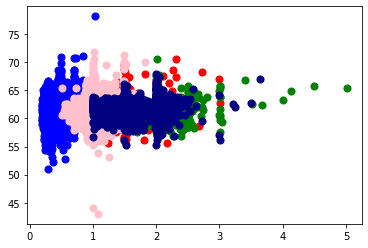

In [46]:
for i in range(5):
    plt.scatter(Z.iloc[kms.labels_ == i,0], Z.iloc[kms.labels_== i,1], c=c[i], s=50, marker='o')

#### 군집이 6개일때

In [48]:
kms = KMeans(n_clusters =6, max_iter =1000, random_state = 2111161445)
kms.fit(Z)

KMeans(max_iter=1000, n_clusters=6, random_state=2111161445)

In [51]:
c = ['red', 'blue', 'green' ,'pink' ,'navy', 'purple']

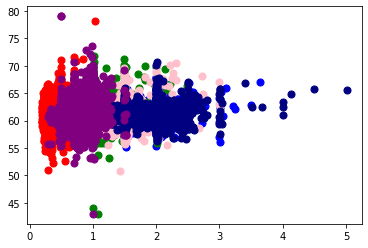

In [53]:
for i in range(6):
    plt.scatter(Z.iloc[kms.labels_ == i,0], Z.iloc[kms.labels_== i,1], c=c[i], s=50, marker='o')

#### 7개일때

In [54]:
c = ['red', 'blue', 'green' ,'pink' ,'navy', 'purple', 'yellow']

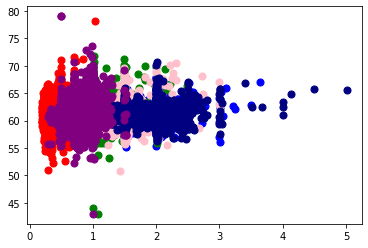

In [55]:
for i in range(7):
    plt.scatter(Z.iloc[kms.labels_ == i,0], Z.iloc[kms.labels_== i,1], c=c[i], s=50, marker='o')

#### 응집형 군집 - 메모리 부족

In [ ]:
linked = linkage(Z, method = 'average')

#### 군집갯수별 실루엣 개수 확인

In [ ]:
mldlpy3.visualize_silhouette([4,5,6,7,8,9,10], Z)